<a href="https://colab.research.google.com/github/Raghu3454/Stock-Market-Price-Prediction/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#download the stock I am considering Apple stock
stock = yf.download("AAPL", start="2015-01-01", end="2024-01-01")

stock.head()

/tmp/ipython-input-1540326675.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.214897,24.682230,23.776357,24.671155,212818400
2015-01-05,23.532721,24.064284,23.346674,23.984549,257142000
2015-01-06,23.534935,23.794071,23.173914,23.596950,263188400
2015-01-07,23.864944,23.964612,23.632385,23.743127,160423600
2015-01-08,24.781902,24.839489,24.075366,24.192754,237458000


In [ ]:
#data processing
stock['Prediction'] = stock['Close'].shift(-1)

# Remove last row (NaN)
stock = stock.dropna()

X = np.array(stock[['Close']])
y = np.array(stock['Prediction'])

In [ ]:
#training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#model evualtion
predictions = model.predict(X_test)

r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.9774756006862941
Mean Squared Error: 7.687217352720407
Mean Absolute Error: 2.088332268560713


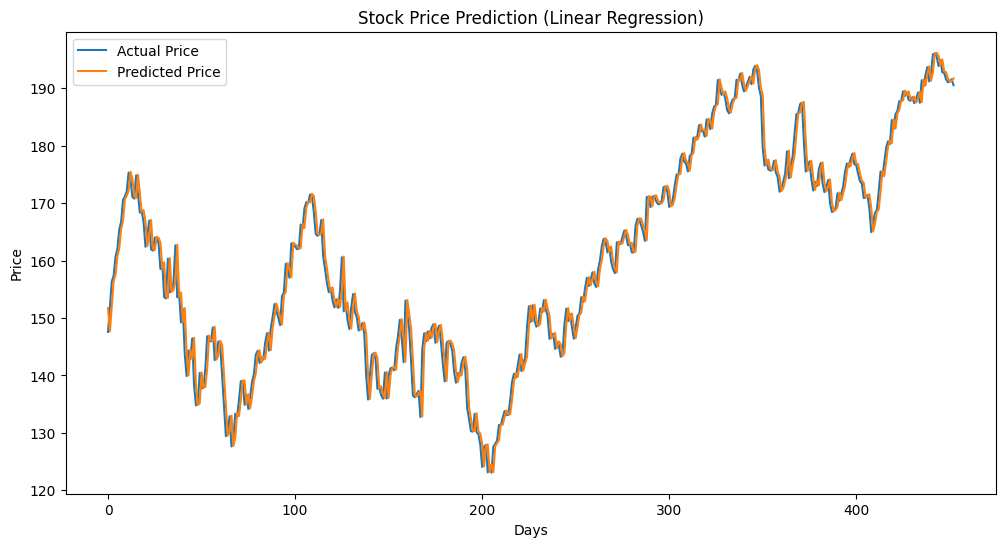

In [ ]:
#plotting the resutls
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("Stock Price Prediction (Linear Regression)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [ ]:
#predicting tommorow price
# Predicting tomorrow price

last_close = stock[['Close']].iloc[-1].values.reshape(1, -1)

tomorrow_price = model.predict(last_close)

print("Tomorrow's Predicted Price:", tomorrow_price[0])
future_days = 7
future_predictions = []

current_input = last_close

for _ in range(future_days):
    next_pred = model.predict(current_input)
    future_predictions.append(next_pred[0])
    current_input = np.array(next_pred).reshape(1, -1)

print("Next 7 Days Prediction:", future_predictions)

Tomorrow's Predicted Price: 191.71962583030273
Next 7 Days Prediction: [np.float64(191.71962583030273), np.float64(191.84963521824858), np.float64(191.97970409436527), np.float64(192.1098324858727), np.float64(192.24002042000325), np.float64(192.37026792400172), np.float64(192.50057502512539)]
